In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
# download ethereum data from yfinance
eth = yf.download('ETH-USD', start='2015-08-07', end='2022-08-07')

# convert to pandas dataframe
eth = pd.DataFrame(eth)

eth.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


<AxesSubplot:xlabel='Date'>

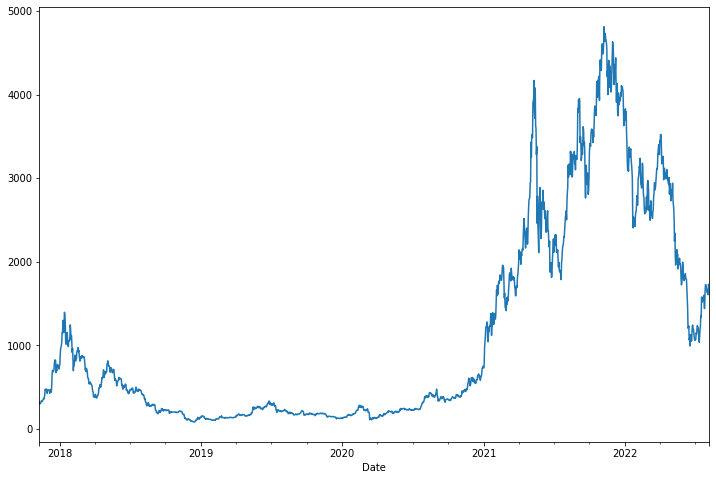

In [15]:
# only preserve the closing price
eth = eth['Close']

# plot the closing price
eth.plot(figsize=(12,8))

ADF Statistic: -1.304910
p-value: 0.626923
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


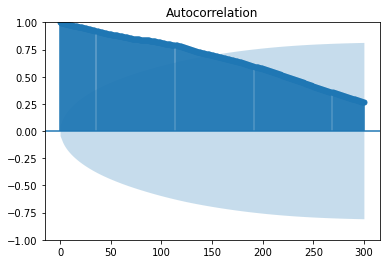

In [16]:
# adfuller test
result = adfuller(eth)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# plot autocorrelaction plot
plot_acf(eth, lags=300)
plt.show()

In [19]:
# import libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# split data into train and test
train_data = eth[:int(0.8*(len(eth)))]
test_data = eth[int(0.8*(len(eth))):]

# grid search for best parameters
p_values = [10, 20, 50]
d_values = range(1, 3)
q_values = [20, 50, 200]

results = {}

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_data, order=order).fit()
            predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
            error = mean_squared_error(test_data, predictions)
            print('ARIMA%s MSE=%.3f' % (order,error))
            # store the results in a dictionary results
            results[order] = error

# print the best parameters
print('Best ARIMA%s MSE=%.3f' % (min(results, key=results.get), results[min(results, key=results.get)]))

# save the best parameters
best_order = min(results, key=results.get)



ARIMA(0, 1, 10) MSE=1070082.556
ARIMA(0, 1, 20) MSE=1059161.477


KeyboardInterrupt: 

In [ ]:
# plot the best model
model = ARIMA(eth, order=best_order).fit()
predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()